In [7]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

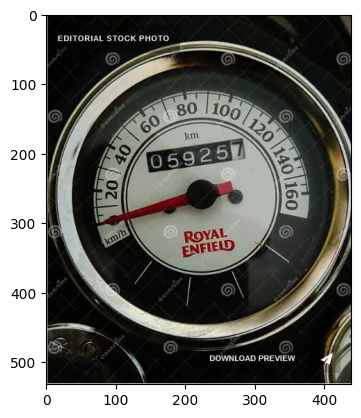

In [8]:
img_cv = cv2.imread(r'C:\Users\rajat.n_elxer\Downloads\bullet.jpg')

img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
# print(pytesseract.image_to_string(img_rgb))

plt.imshow(img_rgb)

# cv2.imshow('Original Image', img_rgb)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


True

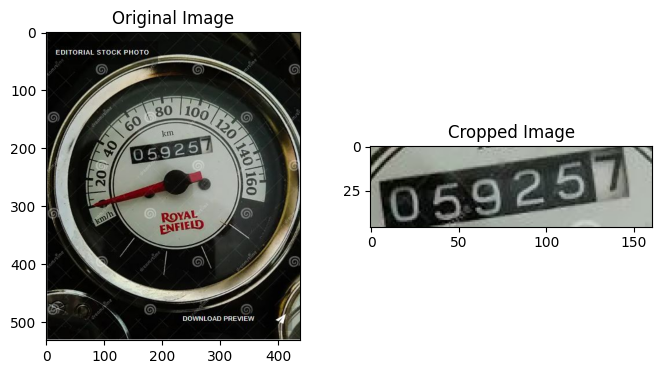

In [9]:

# x1, y1, x2, y2 = 800 ,1100, 1170, 1200

x1, y1, x2, y2 = 139 ,179, 300, 225

cropped_img = img_rgb[y1:y2, x1:x2]

plt.figure(figsize=(8, 4))


plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cropped_img)
plt.title('Cropped Image')
# img_rgb=cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb)
cv2.imwrite(r'C:\Users\rajat.n_elxer\Downloads\cropped_digit.jpg', cropped_img)
# print(pytesseract.image_to_string(cropped_img))

# plt.show()

In [43]:
custom_config = r'--psm 6 -c tessedit_char_whitelist=0123456789'
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\rajat.n_elxer\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"
result = pytesseract.image_to_string(cropped_img, config=custom_config, output_type=pytesseract.Output.DICT)

print("Extracted Odometer Reading:", result['text'].strip())

Extracted Odometer Reading: 059258


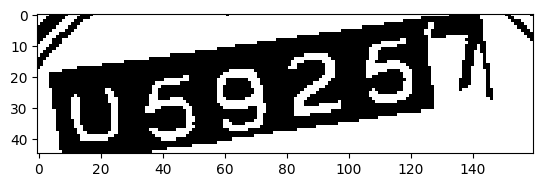

In [9]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Read the cropped image
img_cv = cv2.imread(r'C:\Users\rajat.n_elxer\Downloads\cropped_digit.jpg')
img_gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

# Apply thresholding to enhance the contrast
_, img_threshold = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Display the pre-processed image
plt.imshow(img_threshold, cmap='gray')
plt.show()

In [10]:
custom_config = r'--psm 6 -c tessedit_char_whitelist=0123456789'
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\rajat.n_elxer\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"
result = pytesseract.image_to_string(img_threshold, config=custom_config, output_type=pytesseract.Output.DICT)

print("Extracted Odometer Reading:", result['text'].strip())


Extracted Odometer Reading: 959208


In [5]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Suppress TensorFlow deprecation warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(image, (28, 28))
    preprocessed_image = resized_image.astype('float32') / 255.0
    preprocessed_image = np.reshape(preprocessed_image, (1, 28, 28, 1))
    return preprocessed_image

def recognize_digits(image_path, model_path='mnist_cnn_model'):
    model = load_model(model_path)
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    digit = np.argmax(prediction)
    return digit

if __name__ == "__main__":
    image_path = r'C:\Users\rajat.n_elxer\Downloads\number\contour1.jpg'
    recognized_digit = recognize_digits(image_path, model_path='mnist_cnn_model')

    print("Recognized Digit:", recognized_digit)


1/1 [==============================] - 0s 107ms/step
Recognized Digit: 7


In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the trained model in the native Keras format
model.save('mnist_cnn_model')


Epoch 1/5
750/750 [==============================] - 32s 40ms/step - loss: 0.2262 - accuracy: 0.9309 - val_loss: 0.0684 - val_accuracy: 0.9803
Epoch 2/5
750/750 [==============================] - 29s 38ms/step - loss: 0.0584 - accuracy: 0.9811 - val_loss: 0.0629 - val_accuracy: 0.9809
Epoch 3/5
750/750 [==============================] - 29s 39ms/step - loss: 0.0390 - accuracy: 0.9877 - val_loss: 0.0476 - val_accuracy: 0.9862
Epoch 4/5
750/750 [==============================] - 29s 38ms/step - loss: 0.0301 - accuracy: 0.9902 - val_loss: 0.0491 - val_accuracy: 0.9856
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0303 - accuracy: 0.9896
Test accuracy: 0.9896000027656555
INFO:tensorflow:Assets written to: mnist_cnn_model\assets


INFO:tensorflow:Assets written to: mnist_cnn_model\assets


In [18]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

#printing the shapes of the vectors 
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


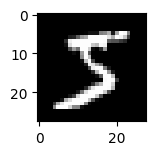

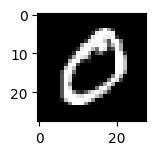

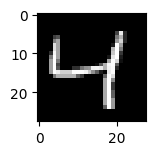

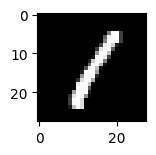

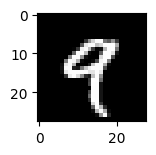

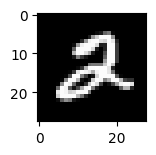

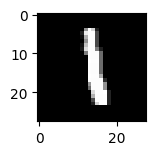

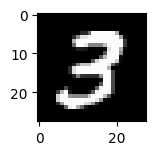

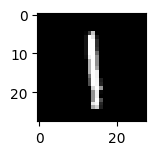

In [25]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()